# 如何微调一个作文批改大模型？

在教育场景中，对于学生作文，通常我们会从作文的内容是否符合题意、作文结构是否严谨、作文是否存在缺点和扣分项等方面，对我们的作文做出评判，并给我们打出最终的得分，这属于偏主观的打分，比较耗费老师的精力。而在大模型时代，大模型也可以成为一名作文点评专家。大模型有很好的格式遵循和风格遵循能力，我们将点评的要求或者模板"调教"给大模型，大模型就能按照我们的要求对一篇作文做出点评和打分。

作文批改大模型，即可以成为老师的得力助手，也能够让学生知道作文还可以从哪些方面提升，大大节省老师批改的成本和时间。

下面我们将结合百度智能云千帆 SDK 运行代码的方式，找到给作文打分的大模型最优解。

# 0. 环境准备

在此部分，我们将讨论使用百度智能云千帆ModelBuilder平台进行推理任务之前的准备工作。这包括获取访问权限、安装 SDK 等内容。

百度智能云千帆SDK: https://github.com/baidubce/bce-qianfan-sdk/tree/main


然后通过如下方式设置鉴权所需的 Access Key 和 Secret Key，相关 Key 可以从 [百度智能云控制台 - 安全认证](https://console.bce.baidu.com/iam/#/iam/accesslist) 页面获得。

In [1]:
!pip install -U qianfan>=0.3.8.2 qianfan[local_data_clean]

In [52]:
import os

# 这里请根据 SDK 文档获取自己的 access key 和 secret key
os.environ["QIANFAN_ACCESS_KEY"] = "xxx"
os.environ["QIANFAN_SECRET_KEY"] = "xxx"

# 1. 大模型推理调用

初探通用大模型作文批改能力，我们从网上找到高考作文的题目，对应的范文，以及评分规则入手，一步步调用大模型激发其能力。

* 题目：[2023年 全国甲卷作文真题](https://easylearn.baidu.com/edu-page/college/composition/analysis?testType=%E5%85%A8%E5%9B%BD%E7%94%B2%E5%8D%B7&year=2023)
* 范文：[我的世界大于这世界](https://easylearn.baidu.com/edu-page/college/composition/detail?id=qgAR%2BsJyVkxHL9IwvSY97g%3D%3D&testType=%E5%85%A8%E5%9B%BD%E7%94%B2%E5%8D%B7&year=2023)





## 1.1 Prompt 初探


本节将介绍如何从用户提供的简单 prompt 出发，构建一个基本的推理任务。我们将演示如何使用百度智能云千帆 SDK 调用大模型以获取模型推理的结果。

作文上，准备了两份数据：高考范文和偏离主题作文。

In [39]:
import qianfan
from qianfan import ChatCompletion, Completion
from qianfan.common import Prompt

prompt = Prompt("请帮我批改如下高考作文，给出评价和评分（0-60分）：\n题目：{question}\n作文内容：{article}")
target = {
    "question": "人们因技术发展得以更好地掌控时间，但也有人因此成了时间的仆人。这句话引发了你怎样的联想与思考？请写一篇文章。要求：选准角度，确定立意，明确文体，自拟标题；不要套作，不得抄袭；不得泄露个人信息；不少于800字。",
    "article": """
我的世界大于这世界
我们消磨时间，也悔恨虚度了时间。在新时代的技术潮流中，当我们学会了用充满科技感的软件感受大千世界，便开始用无限的信息充斥着所有时间——浏览新鲜事儿，刷刷直播视频，关注好友动态……直到耗尽睡前的全部精力。当我们想要获得更多，便开始想尽办法“抢先”“争先”，不断被向前驱赶。
可是，我们的世界不止有这些，我们还可以去欣赏“江间波浪兼天涌，塞上风云接地阴”的壮阔，还可以去感受“揉碎在浮躁间，沉淀着彩虹似的梦”的温柔，更可以来一场“携手藕花湖上路，一霎黄梅细雨”的闲庭信步。只有当我们做了时间的主人才更能体会——我的世界，大于这世界。
时不重至，华不再阳。只有做时间的朋友，才能拥有有意义的人生，创造更有价值的事业。55岁的翟志刚，一直都和所有航天员一样，进行着日复一日的训练。13年间，他先后成为神舟十号和神舟十二号任务的备份航天员。“把结果交给时间，不虚度时间”，让他把梦想放飞在了太空。在北京冬奥会上，谷爱凌流畅的滑线感动了世界，这名18岁的姑娘在接受多家媒体采访时，都曾讲述过在车上写作业，甚至在训练和学业同样繁忙时仍能保持很长睡眠时间的故事。“珍惜时间，合理规划时间”，让她用热爱把冰雪融化。
现如今，技术的进步，正在提高人们利用时间的效率，互联网拉进了人们彼此之间的距离。通过聊天软件，我们可以随时获取信息和交流。过去，一封信是车马慢慢，递送到亲人的手里；现在，邮件秒达在同事的邮箱；功能丰富的购物平台，让买卖的时间大大缩短，人们不再需要通过“逛街”耗费时间和精力；于我们学生来说，在线教育，使得我们可以在自己的时间和节奏下，学习新的技能和知识……通过技术省力省时的现象，在我们身边不胜枚举。
然而，技术是把双刃剑，它让我们对时间的控制越来越精准、自信，同时，也让我们逐渐模糊了时间的概念，我们开始漫无目的地趴在“网”上，消耗时光。再如“节点”“抢先”，也让我们对时间的把控失了味儿。可如果只为达到“节点”，就不会拥有太空漫步的本领，最后只能与梦想擦肩；假如只为一时“抢先”，就不会有一手提着雪板，一手拿着食物走入赛场的从容。我们可以拥抱技术，用时间工具更好地为我们服务，让技术为生活增香添色。但是，我们不要让“科技”、让“时限”，无孔不入包围我们的生活，失去张弛有度的人生。
总之，在通过技术精确利用时间的同时，我们不要愈发深入地陷在时间的束缚和催促下。只有汲取科技的力量，善用时间，才能感受生活的美好，延展自我的世界。正如杜牧所言：“浮生若梦冰如水，日夜东流人不知。”韶华易逝，我们能做的就是在有限的生命长度里拓宽自己无限的宽度和深度。这样，我的世界便大于这世界。
    """,
    "expect": '{"详细解析": {"内容项": {"解析": "文章围绕技术发展对人们时间观念的影响进行了深入的思考和讨论，立意明确，中心突出，内容充实，思想健康，感情真挚。作者通过列举翟志刚和谷爱凌的事例，以及现代科技带来的便利和负面影响，阐述了做时间主人的重要性，并提出了在利用科技的同时，也要善用时间，拓宽生命宽度的观点。整篇文章逻辑清晰，论述有力，符合题意。", "等级": "一等", "得分": "20分"}, "表达项": {"解析": "文章采用议论文的文体，结构严谨，语言流畅，字迹工整，符合文体要求。作者在论述过程中运用了多种论证方法，如举例论证、对比论证等，使文章更具说服力。同时，作者还引用了一些诗句和名言，增加了文章的文采和深度。", "等级": "一等", "得分": "20分"}, "发展等级": {"解析": "文章在立意、内容和表达等方面都表现出较高的水平，尤其是在思想深度和文采方面，作者通过深入的思考和精心的表达，使文章具有了一定的创意和启发性。因此，本文在发展等级方面也可以给予较高的评价。", "等级": "一等", "得分": "20分"}, "扣分项和残篇评定": {"解析": "文章在字数、标题、错别字、标点符号等方面都没有明显的问题，因此不需要扣分。同时，文章也不是残篇，结构完整，论述充分。", "扣分": "0分"}}, "缺点和改进意见": {"缺点": "虽然文章整体表现优秀，但在一些细节方面还可以进一步完善。例如，部分论据的阐述可以更加具体和生动，以增加读者的阅读兴趣和理解深度；另外，个别句子的表达可以更加精炼和准确，以提高文章的整体质量。", "改进意见": "作者可以在今后的写作中注重论据的具体性和生动性，通过描绘更多的细节和场景来增强文章的说服力和感染力；同时，也可以加强对句子表达的锤炼和打磨，力求用更精炼、更准确的语言来表达自己的思想和观点。"}, "最终得分": "60分"}'
}

bad_target = {
    "question": "人们因技术发展得以更好地掌控时间，但也有人因此成了时间的仆人。这句话引发了你怎样的联想与思考？请写一篇文章。要求：选准角度，确定立意，明确文体，自拟标题；不要套作，不得抄袭；不得泄露个人信息；不少于800字。" ,
    "article": """
做网络的主人
随着时代的发展，社会的进步，网络像是一列快车，加速着我们迈进未来的脚步，引领着我们走向瞬息万变的大千世界。
老子说过，一切事物都有正反两面，网络也不例外。“秀才不出门，全知天下事”。坐在电脑前，鼠标轻轻一点，世界近在眼前。优雅的音乐，网上聊天使我们放松心情;奇闻异事，大好河山使我们大开眼界，不出门便走遍大江南北;搞笑的视频使我们的生活增添了几分乐趣;网上购物，读书，使我们的生活变得便捷……网络融入我们的生活，使我们乐在其中!非典”肆虐时期，北京中小学无法正常上课，便开展网上教学，学生们都通过网络在家中上课。多么神奇啊!一根线，一台电脑，既保证了师生们的生命安全，又保证了正常的学习。
网络上有着多于我们书本的知识。因此，我们对网络便产生了依赖，变得懒惰。写作文，不要想，电脑上有抄;做题目，小意思，电脑会告诉我。做作业就像完成任务一样，只要完成就够了。老师为了我们将知识记得更牢固而辛苦布置的作业，我们都顺手抄了，没有记住，离开了电脑我们什么都不会。
网络是把双刃剑，它给予我们思想上的满足，带给我们方便，让我们了解到世界的丰富多彩，同时又让我们沉醉、依赖于它，成了一个个网虫，渐渐因为没有满足而走向违法犯罪。
上网就如同吃饭，会吃的人长精神，不会吃的人长病疽。作为现代人，要有驾驭网络的能力，要充分利用现代科技的先进条件，借网络为已用，化网络为神奇，让生命之舟在网络这个自由海洋里，破激流，越险滩，乘风破浪，鼓帆竞航，奔向理想的彼岸。
“每个人都该承担一定的社会责任，在网上规范言行!”“让网络成为一方净土，从我做起!我们一定要知荣明耻，树网络新风，一句话，网络是我们大家的朋友，需要我们共同维护，我们应当让网络成为我们的朋友，成为我们健康成长的又一个人生舞台。我们应当远离网络的阴暗面，坚决上绿色的网站，做文明的中学生让我们拥有网络吧!它会使你的生活更精彩;让我们拥有网络吧!它会让奔小康的路更宽、更阔!让我们一起呼吁——“绿色上网”!让网络时空绽开文明之花!
    """,
    "expect": ''
}
prompt_r = prompt.render(**bad_target)[0]
print(prompt_r, end='')

请帮我批改如下高考作文，给出评价和评分（0-60分）：
题目：人们因技术发展得以更好地掌控时间，但也有人因此成了时间的仆人。这句话引发了你怎样的联想与思考？请写一篇文章。要求：选准角度，确定立意，明确文体，自拟标题；不要套作，不得抄袭；不得泄露个人信息；不少于800字。
作文内容：
做网络的主人
随着时代的发展，社会的进步，网络像是一列快车，加速着我们迈进未来的脚步，引领着我们走向瞬息万变的大千世界。
老子说过，一切事物都有正反两面，网络也不例外。“秀才不出门，全知天下事”。坐在电脑前，鼠标轻轻一点，世界近在眼前。优雅的音乐，网上聊天使我们放松心情;奇闻异事，大好河山使我们大开眼界，不出门便走遍大江南北;搞笑的视频使我们的生活增添了几分乐趣;网上购物，读书，使我们的生活变得便捷……网络融入我们的生活，使我们乐在其中!非典”肆虐时期，北京中小学无法正常上课，便开展网上教学，学生们都通过网络在家中上课。多么神奇啊!一根线，一台电脑，既保证了师生们的生命安全，又保证了正常的学习。
网络上有着多于我们书本的知识。因此，我们对网络便产生了依赖，变得懒惰。写作文，不要想，电脑上有抄;做题目，小意思，电脑会告诉我。做作业就像完成任务一样，只要完成就够了。老师为了我们将知识记得更牢固而辛苦布置的作业，我们都顺手抄了，没有记住，离开了电脑我们什么都不会。
网络是把双刃剑，它给予我们思想上的满足，带给我们方便，让我们了解到世界的丰富多彩，同时又让我们沉醉、依赖于它，成了一个个网虫，渐渐因为没有满足而走向违法犯罪。
上网就如同吃饭，会吃的人长精神，不会吃的人长病疽。作为现代人，要有驾驭网络的能力，要充分利用现代科技的先进条件，借网络为已用，化网络为神奇，让生命之舟在网络这个自由海洋里，破激流，越险滩，乘风破浪，鼓帆竞航，奔向理想的彼岸。
“每个人都该承担一定的社会责任，在网上规范言行!”“让网络成为一方净土，从我做起!我们一定要知荣明耻，树网络新风，一句话，网络是我们大家的朋友，需要我们共同维护，我们应当让网络成为我们的朋友，成为我们健康成长的又一个人生舞台。我们应当远离网络的阴暗面，坚决上绿色的网站，做文明的中学生让我们拥有网络吧!它会使你的生活更精彩;让我们拥有网络吧!它会让奔小康的路更宽、更阔!让我们一起呼吁——“绿色上网”!让网络时空绽开文明之花!
    

In [40]:
from qianfan import ChatCompletion, Completion

comp = Completion(model="ERNIE-Speed")

result = comp.do(
    prompt=prompt_r,
    stream=True)

for s in result:
    print(s['result'], end='')

文章标题建议修改为“网络时代的双刃剑：掌控时间与沦为时间的仆人”。

整体评价：
这篇文章从网络发展的利弊两个方面进行了深入的思考和探讨。首先，作者指出了网络带来的种种好处，如方便获取信息、增加娱乐、远程教育等，同时也提醒人们网络的便捷带来的依赖性和沉溺性问题。其次，文章也对于上网的合理方式进行了倡导，提出做网络的主人，驾驭网络而非被网络所驾驭的观点。整体而言，文章内容丰富，结构清晰，论证逻辑性强。

评分建议（满分60分）：

1. 内容（20分）：文章紧扣题目要求，从网络时代的掌控时间与时间的仆人这一主题展开，内容充实，观点明确。
2. 语言表达（20分）：文章语言流畅，表达清晰，能够准确阐述自己的观点。
3. 篇章结构（15分）：文章结构完整，层次分明，逻辑清晰。
4. 论证（5分）：论证有力，通过正反两方面的论述，使人对网络的利弊有更深的认识。

总计：60分（满分）

建议修改或增加的部分：

* 在探讨网络依赖和网络沉溺的部分，可以增加一些具体的例子或数据来使观点更具说服力。
* 在最后的部分，可以更进一步呼吁读者如何健康上网，如何正确使用网络，以增加文章的实用性和深度。

总体来说，这是一篇质量较高的高考作文，只要稍作修改和深化，就可以更好地展现出作者的思考和见解。

由于场景比较复杂，如果我们直接调用大模型，从返回的结果来看，可能会发现存在如下问题：

* 评分不能准确遵循要求，打分普遍偏高
* 输出的格式不固定，也没细分项打分
* 作文解析比较空泛，给出的意见指导性较差

开始着手与 Prompt 优化调整。通过调用百度智能云千帆ModelBuilder平台提供的prompt优化接口，可先进行初步快速优化：
* 平台Prompt优化：https://console.bce.baidu.com/qianfan/prompt/optimize/online 
* Prompt 优化文档：https://cloud.baidu.com/doc/WENXINWORKSHOP/s/Clommng91 


In [41]:
# 调用平台优化能力，耗时10秒左右
# optimized_prompt = prompt.optimize()
optimized_prompt = Prompt("""您需要帮助批改一篇高考作文，请根据以下要求给出评价和评分（0-60分）：
题目：{question}
作文内容：{article}
请注意，您的批改应该包括以下方面：
1. 判断作文的主题和目的；
2. 分析作文的结构和逻辑；
3. 评估作文的语言和表达；
4. 检查作文的拼写和语法；
5. 综合评价作文的优缺点。
请在回答中提供详细的解释和说明，以帮助作者了解您的批改和改进建议。同时，请注意提供正面的反馈和指导，以激励作者继续改进和提高作文水平。
""")
print(optimized_prompt.template)

您需要帮助批改一篇高考作文，请根据以下要求给出评价和评分（0-60分）：
题目：{question}
作文内容：{article}
请注意，您的批改应该包括以下方面：
1. 判断作文的主题和目的；
2. 分析作文的结构和逻辑；
3. 评估作文的语言和表达；
4. 检查作文的拼写和语法；
5. 综合评价作文的优缺点。
请在回答中提供详细的解释和说明，以帮助作者了解您的批改和改进建议。同时，请注意提供正面的反馈和指导，以激励作者继续改进和提高作文水平。



然而以上 prompt 由于并不清楚任务的具体要求，给出的要求也较为笼统，因此我们需要进一步对 prompt 进行细化，这时候可以通过 prompt 框架来指引优化。

CRISPE 是一个通用的 prompt 框架，CRISPE是首字母的缩写，分别代表以下含义：
-  CR：Capacity and Role（能力与角色）：这是你给大模型立下的人设。
-  I：Insight（洞悉；领悟）：这是你为大模型提供的背景信息和上下文。
-  S：Statement（表述；声明）：你希望大模型具体执行的任务。
-  P：Personality（人格；性格）：你希望大模型输出内容的风格。
-  E：Experiment（尝试；实践）：你给大模型所做的限制条件。

我们可以基于这个框架，提供更多的关于人设、输出结构、批改要求等信息。[CRISPE Prompt 介绍](https://cloud.baidu.com/doc/WENXINWORKSHOP/s/3lommshv8 )

In [42]:
# 我们加入了高考评分规则，以及对应的角色信息，提供由平台优化得到的输出内容要求，一起组装 CRISPE 模板
essay_rule = """
高考作文评分批改分为基础等级、发展等级、关于作文的其他项评定
        1、基础等级
        基础等级分内容和表达两项。
        1）内容项
        具体评分规则如下：符合题意、中心突出、内容充实、思想健康、感情真挚为一等，可按16-20分酌情给分；符合题意、主题明确、内容较充实、思想健康、感情真实为二等，可按11-15分酌情给分；基本符合题意、中心基本明确、内容单薄、思想基本健康、感情基本真实为三等，可按6-10分酌情给分；偏离题意、中心不明确、内容不当、思想不健康、感情虚假为四等，可按0-5分酌情给分。
        2）表达项
        具体评分规则如下：符合文体要求、结构严谨、语言流畅、字迹工整为一等，可按16-20分酌情给分；符合文体要求、结构完整、语言通顺、字迹清楚为二等，可按11-15分酌情给分；基本符合文体要求、结构基本完整、语言基本通顺、字迹基本清楚为三等，可按6-10分酌情给分；不符合文体要求、结构混乱、语言不通顺语病多、字迹潦草难辨为四等，可按0-5分酌情给分。
        2、发展等级
        基础等级分要与发展等级分相匹配，发展等级分不能跨越基础等级的得分等级。
        具体评分规则如下：深刻、丰富、有文采、有创意为一等，可按16-20分酌情给分；较深刻、较丰富、较有文采、较有创意为二等，可按11-15分酌情给分；略显深刻、略显丰富、略显文采、略显创意为三等，可按6-10分酌情给分；个别语句有深意、个别例子较好、个别语句较精彩、个别地方有深意为四等，可按0-5分酌情给分。
        3、关于作文的其他项评定
        1）扣分项评定
        出现错别字，1个错别字扣1分，重复不计，扣完5分为止;标点符号出现3处以上错误的酌情扣分;不足字数者，每少50字扣1分;无标题扣2分。
        2）残篇评定
        400字以上的文章，按评分标准评分，扣字数分。(少50个字扣1分)
        400字以下的文章，20分以下评分，不再扣字数分。
        200字以下的文章，10分以下评分，不再扣字数分。
        只写一两句话的，给1分或2分，不评0分。
        只写标题的，给1分或2分，不评0分。
        完全空白的，评0分.
"""

crispe_prompt = Prompt(Prompt.crispe_prompt(
    statement="请帮助我批改这篇高考作文，并给出相应的评价和评分（0-60分）",
    capacity="你是一个高中语文老师\n",
    insight="\n作文批改规则：" + essay_rule + "\n作文题目: {{question}}\n作文内容：{{article}}\n",
    personality="""你的回答应该细致、具体，并针对文章的每个方面进行点评，包括结构、语言、逻辑、文采等方面。你应该给出明确的建议和指导，以帮助作者改进文章质量，并提高其得分。同时，你的回答应该主题需要和题目要求一致，紧扣标准和要求，不偏离主题，体现公正和客观。""",
    experiment='按照以下json格式输出：{"详细解析":{"内容项": {"解析": "xxxxxx。","等级": "xx等","得分": "xx分"},"表达项": {"解析": "xxxxxx。","等级": "xx等","得分": "xx分"},"发展等级": {"解析": "xxxxxx。","等级": "xx等","得分": "xx分"},"扣分项和残篇评定": {"解析": "xxxxxx。","扣分": "xx分"}},"缺点和改进意见": {"缺点": "xxxxxx。","改进意见": "xxxxxxx。"},"最终得分": "xx分"}'
    ),
    identifier="{{}}"
)

In [56]:
# 并对优化的 Prompt 进行平台侧的评估打分，使用ERNIE-3.5旗舰版模型进行初步打分
prompts = {"起始 Prompt": prompt, "平台优化 Prompt": optimized_prompt, "CRISPE Prompt": crispe_prompt}
for key, p in prompts.items():
    print(f"{key}：\n{p.template}\n {'-' * 30}")

scenes = [
    {
        "args": target,
        "expected": target['expect']
    },
]

# Prompt评估打分，对应产品链接：https://console.bce.baidu.com/qianfan/prompt/evaluate 

print("\n\n")
results = Prompt.evaluate(prompts.values(), scenes, Completion(model="ERNIE-3.5-8K"))
for i, p in enumerate(prompts.items()):
    print(f"{p[0]} 分数：{results[i].scene[0]['score']}")


起始 Prompt：
请帮我批改如下高考作文，给出评价和评分（0-60分）：
题目：{question}
作文内容：{article}
 ------------------------------
平台优化 Prompt：
您需要帮助批改一篇高考作文，请根据以下要求给出评价和评分（0-60分）：
题目：{question}
作文内容：{article}
请注意，您的批改应该包括以下方面：
1. 判断作文的主题和目的；
2. 分析作文的结构和逻辑；
3. 评估作文的语言和表达；
4. 检查作文的拼写和语法；
5. 综合评价作文的优缺点。
请在回答中提供详细的解释和说明，以帮助作者了解您的批改和改进建议。同时，请注意提供正面的反馈和指导，以激励作者继续改进和提高作文水平。

 ------------------------------
CRISPE Prompt：
能力与角色：你是一个高中语文老师

背景信息：
作文批改规则：
高考作文评分批改分为基础等级、发展等级、关于作文的其他项评定
        1、基础等级
        基础等级分内容和表达两项。
        1）内容项
        具体评分规则如下：符合题意、中心突出、内容充实、思想健康、感情真挚为一等，可按16-20分酌情给分；符合题意、主题明确、内容较充实、思想健康、感情真实为二等，可按11-15分酌情给分；基本符合题意、中心基本明确、内容单薄、思想基本健康、感情基本真实为三等，可按6-10分酌情给分；偏离题意、中心不明确、内容不当、思想不健康、感情虚假为四等，可按0-5分酌情给分。
        2）表达项
        具体评分规则如下：符合文体要求、结构严谨、语言流畅、字迹工整为一等，可按16-20分酌情给分；符合文体要求、结构完整、语言通顺、字迹清楚为二等，可按11-15分酌情给分；基本符合文体要求、结构基本完整、语言基本通顺、字迹基本清楚为三等，可按6-10分酌情给分；不符合文体要求、结构混乱、语言不通顺语病多、字迹潦草难辨为四等，可按0-5分酌情给分。
        2、发展等级
        基础等级分要与发展等级分相匹配，发展等级分不能跨越基础等级的得分等级。
        具体评分规则如下：深刻、丰富、有文采、有创意为一等，可按16-20分酌情给分；较深刻、较丰

In [59]:
# 看看优化后的效果

result = comp.do(
    prompt=crispe_prompt.render(**bad_target)[0],
    stream=True)

for s in result:
    print(s['result'], end='')
    

```json
{"详细解析": {"内容项": {"解析": "文章内容项主要围绕网络的正反两面展开，先列举了网络带来的好处，如获取信息、学习、娱乐等，再指出过度依赖网络带来的问题，最后提出如何正确对待网络。整体上内容较为完整，立意明确。", "等级": "一等的", "得分": "19分"}, "表达项": {"解析": "文章结构清晰，先提出论点，再展开论述，最后总结呼吁，符合议论文的基本结构。语言通顺，字迹工整。但个别地方语言不够精炼。", "等级": "一等的", "得分": "17分"}, "发展等级": {"解析": "文章在深刻、丰富、有文采、有创意等方面表现较好。作者能够联想和思考，从网络技术对时间掌控的正反两面展开论述，最后提出正确对待网络的方法，显示出一定的深刻性。同时，文章使用了不少生动的语言和例子，显示出一定的文采。", "等级": "一等的", "得分": "19分"}, "扣分项和残篇评定": {"解析": "文章未出现错别字、标点符号错误，字数达到800字以上，无扣分项。", "扣分": "0分"}}, "缺点和改进意见": {"缺点": "文章在语言表达上个别地方不够精炼，有些地方可以更加具体和生动。在论证过程中，虽然提到了网络的负面影响，但未能深入展开，例如可以具体描述一些网络依赖的症状和案例，使论证更加有力。", "改进意见": "1. 在使用网络相关的表述时，可以更加生动和具体，避免过于笼统的描述。\n2. 在论述网络的负面影响时，可以增加一些具体的例子和症状，使论证更加深入和有力。\n3. 在文章结尾部分，可以进一步强调如何正确对待网络的具体做法，使文章更加具有实践指导意义。", "最终得分": "55分"}
```

In [22]:
# ERNIE-3.5 效果
# ```json
# {"详细解析": {"内容项": {"解析": "文章围绕技术发展对人们时间观念的影响，特别是网络的双刃剑特性进行了讨论，与题目
# 要求相符合，中心明确，内容充实，思想健康。但在部分论述中，如网络对时间掌控的具体影响、成为时间仆人的具体表现等方面略显薄弱。", 
# "等级": "二等","得分": "14分"}, "表达项": {"解析": "文章结构完整，按照引入话题、分析利弊、提出建议的逻辑进行组织，
# 条理清晰。语言表达通顺，但在文采方面略显平淡，缺少一些生动、形象的描绘和修辞手法的运用。", "等级": "二等","得分": "
# 13分"}, "发展等级": {"解析": "文章在论述网络对时间观念的影响时，有一定的深度和广度，能够结合正反两方面进行分析，
# 但在创新性和文采方面仍有提升空间。", "等级": "二等","得分": "12分"}}, "扣分项和残篇评定": {"解析": "文章未出现明
# 显的错别字、标点符号错误或字数不足的问题，因此不扣分。", "扣分": "0分"}, "缺点和改进意见": {"缺点": "1. 部分论述内
# 容略显单薄，缺乏具体例证支持。 2. 语言表达文采不足，缺乏吸引力。 3. 创新性不够突出，未能提供独特见解或新颖角度。", 
# "改进意见": "1. 在论述网络对时间掌控的影响和成为时间仆人的表现时，可以加入更多具体的生活案例或社会现象进行分析，
# 使内容更丰富、有说服力。 2. 注重文采的提升，可以运用比喻、排比等修辞手法，使语言更生动、形象。3. 尝试从独特角度切入话题，
# 提供新颖的观点或见解，以增加文章的创新性。"}, "最终得分": "39分"}
# ```

优化后的prompt效果有一定提升，但是效果上与超大参数规模模型ERNIE-3.5/ERNIE-4.0存在差距。

为了进一步提升模型的性能，可以对模型进行 SFT。

# 2. 大模型微调优化


## 2.1 数据准备

众所周知，训练模型时需要提前准备好相关的数据集，而数据集的获取通常是一个耗时耗力的过程。这不仅对于数据的数量有要求，为了让大模型的输出质量更符合我们的预期，数据的文本质量也有一定要求。



### 2.1.1 收集种子数据

由于获取足够量的真实高考作文有一定难度，本教程将采用生成式思路，通过大模型，在原始的种子数据集上进行数据增强，以生成足够量的数据集并用于模型训练。

我们通过网页爬虫手段，从互联网上获取到了近 10 年高考作文的种子数据集，总共 146 篇（提供了5个示例数据，见`data/essay-seed-sample.json`）

用户可以使用百度智能云千帆 SDK 来快速预览这些数据。`Dataset` 类提供了简易的数据透视能力，可以通过调用 `show_overview_info`方法来观察数据集的基本信息，如条数、重复率、占空比：

In [43]:
from qianfan.dataset import Dataset

# 为了演示流畅，抽取5条种子进行流程演示
seed_dataset = Dataset.load(data_file="data/essay_seed_sample.json")
seed_dataset.show_overview_info()

[INFO] [05-13 16:55:34] dataset.py:407 [t:140413228508992]: no data source was provided, construct
[INFO] [05-13 16:55:34] dataset.py:275 [t:140413228508992]: construct a file data source from path: data/essay_seed_sample.json, with args: {}
[INFO] [05-13 16:55:34] file.py:293 [t:140413228508992]: use format type FormatType.Json
[INFO] [05-13 16:55:34] utils.py:348 [t:140413228508992]: start to get memory_map from /root/.qianfan_cache/dataset/mnt/cfs_bj/lijie/work/jupyter/essay/data/essay_seed_sample.arrow
[INFO] [05-13 16:55:34] utils.py:276 [t:140413228508992]: has got a memory-mapped table


entry count: 5

                    prompt    response
----------------  --------  ----------
reputation_ratio         0           0
null_ratio               0           0


### 2.1.2 分析种子数据

百度智能云千帆 SDK 的 `DataInsgiht` 组件为开发者提供了开箱即用的简易数据统计能力，方便开发者能在一些关键指标上对数据集有更加直观的感受。

目前百度智能云千帆 SDK 中内置了四种分析指标，分别是：

- 字数统计 `get_content_length_for_each_entry`：统计所有字符数量
- 字符重复率统计 `get_character_repetition_ratio`： 采用 N-Gram 算法计算相邻窗口中重复出现的字所占所有字的占比
- 特殊字符占比统计 `get_special_characters_ratio`： 统计特殊字符的占比，这些特殊字符包括标点符号，数字，空格，以及我们自己收集的特殊字符集，如 ゜ʼ≖ʼ¤ッツシ℃√！【】
- 敏感词占比分析 `get_flagged_word_ratio`：计算色情词汇在文本中的占比

其中 `敏感词占比分析` 需要用户自行准备可用的 SentencePiece 模型。

用户可传入符合参数要求的自定义分析函数，来实现自定义的分析指标展示。默认使用的分析指标为字数统计、字符重复率统计、特殊字符占比统计

接下来，我们在种子数据集的作文内容列上计算默认指标。

In [44]:
from qianfan.dataset.data_insight.insight import DatasetInsight

insighter = DatasetInsight()
insighted_ds = insighter.insight(seed_dataset, "response")

insighted_ds.col_append(seed_dataset["prompt"])
insighted_ds[0]

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[INFO] [05-13 16:55:57] utils.py:462 [t:140413228508992]: start to write arrow table to /root/.qianfan_cache/dataset/.mapper_cache/mnt/cfs_bj/lijie/work/jupyter/essay/data/essay_seed_sample_7b422b8a-02e2-40d1-8b3d-9c3f01ba2ca6.arrow
[INFO] [05-13 16:55:57] utils.py:478 [t:140413228508992]: writing succeeded
[INFO] [05-13 16:55:57] utils.py:348 [t:140413228508992]: start to get memory_map from /root/.qianfan_cache/dataset/.mapper_cache/mnt/cfs_bj/lijie/work/jupyter/essay/data/essay_seed_sample_7b422b8a-02e2-40d1-8b3d-9c3f01ba2ca6.arrow
[INFO] [05-13 16:55:57] dataset.py:993 [t:140413228508992]: list local dataset data by 0


{'content_length': 874,
 'character_repetition_ratio': 0.0,
 'special_characters_ratio': 0.14759725400457666,
 'response': '新时代新青年——谈在祖国发展中成长\n节物风光不相待，沧海桑田须臾改。如今，我们青年已经走到了一个重要的历史坐标——“新时代”。新时代中，新青年们要摆出怎样的姿态?未来国家的中坚力量，此时无须挥斥方遒，也不必指点江山。在我看来，只须脚踏实地，心向远方。\n放眼当下，令人遗憾和忧虑的是“佛系”与“丧文化”正在不知不觉中侵蚀着一些青年的心灵，使他们采取一种“什么都行，不大走心，看淡一切”的活法。其原因固然是多元的，但是“高不成低不就”的工作和沉溺于眼前苟且的低俗趣味无疑占极大比重。此时，他们应当有脚踏实地、心向远方的精神。\n“苔花如米小，也学牡丹开。”技校生是一个受人轻视的群体，而小聂却能在世界技能大赛中展现出“大国工匠”的气概，怎能不使“群居而笑之”之徒黯然失色!职业从无贵贱之分，只要脚踏实地，在平凡岗位中也能够创造不平凡。\n将个人素养与国家复兴“中国梦”相结合，应成为新时代青年的人生信条。在北大数学系被奉为“天才”的付云皓，注意到我国在数学基础教育方面的短板，放弃高端研究转而成为数学竞赛的老师，他与为“中国制造”而奋斗的工人们一样，都具有超越小我的眼光，心向远方，肩挑家国重任的他们，着实值得点赞。\n伊斯兰教创始人穆罕默德曾言：“如果你有两块面包，你得拿出一块来换一朵水仙花。”作为新时代的青年，我们要学习雷海为，像他一样在平凡的世界中，不抛弃、不放弃对“诗和远方”的追求。他用中华优秀传统文化滋养精神家园，收获的是姹紫嫣红的美景。\n雷海为自食其力，谁能说他不是脚踏实地呢?他以一己之力关照中华民族文化命运，目光如炬照亮文化自信之路。天地之大，近在胸中。在他身上，我们看到的是心向远方的灵魂。\n“中国梦是过去的、当下的，也是未来的，它终将在青年们的奋斗中变为现实。”从小聂、雷海为这两位青年身上，我们看到了他们在自我成长与国家担当两方面的奋斗。脚踏实地，心向远方，这是我们新时代青年对时代的满分答卷，是响应时代号召的最好姿态。\n新时代，是国家全面转型的时代，是每个人全面发展的时代。造次必于是，颠沛必于是。而我们青年，心向远方

`Dataset` 还提供了 `show_processed_statistics` 方法来展示单条数据的计算指标的统计信息。

`show_processed_statistics` 方法接受一个包含数值列的数据集，以及一个包含 `SummarizationMethod` 对象的 List。`SummarizationMethod` 对象包含了对数值列进行统计的信息。

目前我们支持四种统计方法：
- 均值 `MeanMethod`
- 分位数 `QuantileMethod`
- 最大值 `MaxMethod`
- 最小值 `MinMethod`

该方法默认统计：各数值列的均值、80% 和 90% 分位数、最大值以及最小值。

我们使用该方法去统计得到的计算指标的统计值并展示

In [45]:
insighted_ds.show_processed_statistics()

[INFO] [05-13 16:56:17] dataset.py:993 [t:140413228508992]: list local dataset data by 0


               content_length    character_repetition_ratio    special_characters_ratio
-------------  ----------------  ----------------------------  --------------------------
mean           962.6             0.0006335797254487857         0.1426759630204451
min            867               0.0                           0.12226066897347174
max            1129              0.0031678986272439284         0.1550044286979628
80.0_quantile  1015.4            0.0006335797254487862         0.15401343804084777
90.0_quantile  1072.2            0.0019007391763463573         0.1545089333694053


## 2.2 数据增强

由于对于作文批改这个场景需要至少 1000 个标注样本，而上述我们所收集到的数据只有 146 条，且不包含打分数据。我们需要通过大模型生成的方式对训练数据进行数据增强。

通过网页搜索获取全国2009年-2018年高考语文作文题目，10年共144个题目，随机抽取77个题目作为后续实验作文题目来源，见`data/examination_titles.json`。

抽取的作文题目示例：

`阅读下的材料，根据要求写一篇不少于800 字的文章。兔子是历届小动物运动会的短跑冠军，可是不会游泳。一次兔子被狼追到河边，差点被抓住。动物管理局为了小动物的全面发展，将小兔子送进游泳培训班，同班的还有小狗、小龟和小松鼠等。小狗、小龟学会游泳，又多了一种本领，心里很高兴：小兔子和小松鼠花了好长时间都没学会，很苦恼。培训班教练野鸭说："我两条腿都能游，你们四条腿还不能游？成功的90%来自汗水。加油！呷呷！"评论家青蛙大发感慨："兔子擅长的是奔跑！为什么只是针对弱点训练而不发展特长呢？"思想家仙鹤说："生存需要的本领不止一种呀！兔子学不了游泳就学打洞，松鼠学不了游泳就学爬树嘛。"要求选准角度，明确立意，自选文体，自拟标题；不要脱离材料内容及含意的范围作文，不套作，不得抄袭。`

数据增强包含两个方面，一是对作文数据进行增强，二是对打分数据进行增强。

大模型生成数据的一般思路包括：

1. 使用 Prompt 为大模型指定人设与指令，在这个场景下为高考考生编写高考作文。
2. 传入完成任务所需的基本信息，如题目与期望生成的质量、评分标准等。
3. 获取大模型的输出，并且根据需要进行一定程度的筛选与清洗。
4. 重复上述步骤

百度智能云千帆 SDK 提供的 `Dataset` 模块除了包含了对数据集进行加载、处理等功能以外，还内置了根据数据集内容进行批量推理的功能。用户可以根据自己的需要对数据集进行批量推理，从而生成新的数据。

并且批量推理能力还支持用户传入自定义的 Prompt 模板，从而实现在不修改数据集的前提下，灵活构造实际用于推理的输入数据。



**作文生成大模型选择：** 为了防止生成的作文风格一样，所以我们没有采用由一个大模型生成作文的方式，而是采用了四种不同的大模型，这样生成的作文在风格上多样，也更符合实际场景。

模型：ERNIE-4.0-8K、ERNIE-3.5-8K、ERNIE-Speed-8K、ChatGLM2-6B-32K

**设置作文生成Prompt：** 现实生活中，高考语文作文有质量高的、质量普通的、质量很低的，还存在残篇，如果只采用一种prompt，则无法检验大模型批改能力的完整性，所以我们需要设置多种prompt，使生成的作文更加符合写作质量真实分布情况。根据真实作文的分布情况，我们设置四种prompt：生成质量高的、生成质量一般的、生成质量低的和生成残篇。

In [60]:
# 作文题目
import json
examination_titles = json.load(open("data/examination_titles.json", mode="r", encoding="utf-8"))
print(examination_titles[0])

阅读下面的材料，根据要求写作。
2000年 农历庚辰龙年，人类迈进新千年，中国千万“世纪宝宝”出生。
2008年 汶川大地震。北京奥运会。
2013年 “天宫一号”首次太空授课。
公路“村村通”接近完成；“精准扶贫”开始推动。
2017年 网民规模达7.72亿，互联网普及率超全球平均水平。
2018年 “世纪宝宝”一代长大成人。
……
2020年 全面建成小康社会。
2035年 基本实现社会主义现代化。
一代人有一代人的际遇和机缘、使命和挑战。你们与新世纪的中国一路同行、成长，和中国的新时代一起追梦、圆梦。以上材料触发了你怎样的联想和思考？请据此写一篇文章，想象它装进“时光瓶”留待2035年开启，给那时18岁的一代人阅读。
要求：选好角度，确定立意，明确文体，自拟标题，不要套作，不得抄袭，不得泄露个人信息；不少于800字。


In [61]:
import random
from typing import Dict, List, Any


# 使用这些作文题目来构造用于训练的数据集
title_set: List[str] = []

for title in examination_titles:
    title_set.append(title)

pure_title_set = Dataset.create_from_pyobj({"title": title_set}, input_columns=["title"])

# 但出于体验流程考虑，我们实际只随机取两个题目生成
pure_title_set.sample(2)
pure_title_set.list()

[{'title': '小时候人们喜欢发问，长大后往往看重结论。对此，有人感到担忧，有人觉得正常，你有怎样的思考？请写一篇文章，谈谈你的认识。\n要求：（1） 自拟题目；(2） 不少于800字。'},
 {'title': '近年来，浙江省着力强化创新驱动，深入实施人才强省、创新强省首位战略，深入实施“鲲鹏行动”“高层次人才特殊支持计划”等人才工程，全省高质量发展水平持续提升。\n新时代浙江青年，在各行各业、不同领域开拓创新。如95后姑娘徐枫灿，在空军航空大学刻苦训练、满分通过考核，成为我国陆军首位初放单飞的女飞行员；90后青年工人杨杰，从一名普通的学徒工成长为“浙江工匠”，获得浙江省劳动模范称号；之江实验室智能超算研究中心团队，35岁以下成员占比近九成，勇闯国内智能超算领域“无人区”，斩获超算应用领域的国际最高奖项——戈登贝尔奖……\n以上材料对你未来发展有什么启示？请写一篇文章。\n【注意】①角度自选，立意自定，题目自拟。②明确文体，不得写成诗歌。 ③不得少于800字。 ④不得抄袭、套作。'}]

然后，我们加载我们需要用于生成作文的 Prompt 模板。

In [62]:
from qianfan.common import Prompt

with open("prompt/essay_generating.prompt", mode="r") as f:
    generating_prompt_template = f.read()

In [63]:
# 使用四个模型针对题目按照四种prompt分别生成对应的作文
from essay_data_aug import (
    generate_essay_dataset,
    task_unit_list,
)
model_names = ["ERNIE-4.0-8K", "ERNIE-3.5-8K", "ERNIE-Speed-8K", "ChatGLM2-6B-32K"]

content_dataset_list = []

for task in task_unit_list:
    init_flag = 0
    for model_name in model_names:
        if init_flag == 0:
            content_dataset = generate_essay_dataset(task, pure_title_set, service_model_name=model_name)
            init_flag = 1
        else:
            content_dataset.concat_table(generate_essay_dataset(task, pure_title_set, service_model_name=model_name))
    content_dataset_list.append(content_dataset)

In [64]:
content_dataset_list[0].list()

[{'title': '小时候人们喜欢发问，长大后往往看重结论。对此，有人感到担忧，有人觉得正常，你有怎样的思考？请写一篇文章，谈谈你的认识。\n要求：（1） 自拟题目；(2） 不少于800字。',
  'essay': '**题目：从好问到重结论：人生阅历中的智慧变迁**\n\n小时候，我们总是怀揣着对这个世界无尽的好奇，每一个问题都像是打开新世界大门的钥匙。长大后，我们渐渐看重结论，每一个确定的答案都像是稳固我们人生观的基石。对于这一变化，有人担忧我们失去了初心，有人则认为这是成长的必然。而我认为，从好问到重结论，实则是人生阅历中的智慧变迁。\n\n好问是孩童时期的天性，也是我们对世界认知的起点。孩子们的问题天马行空，无论是“为什么天是蓝的”还是“为什么我不能像小鸟一样飞”，这些问题都充满了对未知的渴望和探索。这种好问的精神，不仅培养了我们的思考能力，更激发了我们的想象力和创造力。在这个阶段，问题本身比答案更重要，因为它代表着无限的可能性和探索的空间。\n\n然而，随着年岁的增长，我们逐渐从好问转向重结论。这一转变并非意味着我们失去了好奇心，而是我们在经历了无数次的探索和实践后，开始学会从问题中提炼出核心，形成自己的见解和判断。重结论的过程，实际上是我们对知识的整合和内化，是我们从纷繁复杂的信息中筛选出真正有价值的东西。这不仅提高了我们的效率，更使我们在面对问题时能够迅速作出反应，从而更好地适应这个瞬息万变的社会。\n\n当然，重结论并不意味着我们要放弃好问的精神。相反，只有在不断提问、不断探索的基础上，我们才能得出更加深入、更加全面的结论。好问和重结论并不矛盾，而是相辅相成的。好问让我们保持对世界的好奇和敏感，而重结论则让我们在好奇的基础上形成自己的思考和判断。\n\n从更广阔的视角来看，好问到重结论的转变也体现了我们人生阶段的进步和成长。在孩童时期，我们通过提问来认识世界、了解自我；而在成年后，我们通过整合结论来指导实践、实现自我。这一过程中，我们不仅积累了知识，更锤炼了心智、提升了境界。\n\n因此，面对从好问到重结论的转变，我们无需过于担忧或抵触。这是人生阅历中的自然演变，也是智慧成长的必由之路。我们应该珍惜这一过程中的每一个阶段，无论是好问带来的探索乐趣，还是重结论带来的思考深度，它们都是我们人生旅途中宝贵的财富。让我们在好问与重结论的交织中，不断前行

In [65]:
with open("prompt/essay_scoring.prompt", mode="r") as f:
    correction_prompt_template = f.read()
# 作文评改要求
with open("prompt/correction_rules.prompt", mode="r") as f:
    correction_rules = f.read()

In [66]:
# 使用ERNIE-4.0进行评分
from essay_data_aug import generate_correction_dataset

unfiltered_dataset_list: List[Dataset] = []

for content_dataset in content_dataset_list:
    unfiltered_dataset_list.append(
        generate_correction_dataset(content_dataset, service_model_name="ERNIE-4.0-8K")
    )

In [67]:
print(len(unfiltered_dataset_list))
print(unfiltered_dataset_list[0].list())

4
[{'title': '小时候人们喜欢发问，长大后往往看重结论。对此，有人感到担忧，有人觉得正常，你有怎样的思考？请写一篇文章，谈谈你的认识。\n要求：（1） 自拟题目；(2） 不少于800字。', 'essay': '**题目：从好问到重结论：人生阅历中的智慧变迁**\n\n小时候，我们总是怀揣着对这个世界无尽的好奇，每一个问题都像是打开新世界大门的钥匙。长大后，我们渐渐看重结论，每一个确定的答案都像是稳固我们人生观的基石。对于这一变化，有人担忧我们失去了初心，有人则认为这是成长的必然。而我认为，从好问到重结论，实则是人生阅历中的智慧变迁。\n\n好问是孩童时期的天性，也是我们对世界认知的起点。孩子们的问题天马行空，无论是“为什么天是蓝的”还是“为什么我不能像小鸟一样飞”，这些问题都充满了对未知的渴望和探索。这种好问的精神，不仅培养了我们的思考能力，更激发了我们的想象力和创造力。在这个阶段，问题本身比答案更重要，因为它代表着无限的可能性和探索的空间。\n\n然而，随着年岁的增长，我们逐渐从好问转向重结论。这一转变并非意味着我们失去了好奇心，而是我们在经历了无数次的探索和实践后，开始学会从问题中提炼出核心，形成自己的见解和判断。重结论的过程，实际上是我们对知识的整合和内化，是我们从纷繁复杂的信息中筛选出真正有价值的东西。这不仅提高了我们的效率，更使我们在面对问题时能够迅速作出反应，从而更好地适应这个瞬息万变的社会。\n\n当然，重结论并不意味着我们要放弃好问的精神。相反，只有在不断提问、不断探索的基础上，我们才能得出更加深入、更加全面的结论。好问和重结论并不矛盾，而是相辅相成的。好问让我们保持对世界的好奇和敏感，而重结论则让我们在好奇的基础上形成自己的思考和判断。\n\n从更广阔的视角来看，好问到重结论的转变也体现了我们人生阶段的进步和成长。在孩童时期，我们通过提问来认识世界、了解自我；而在成年后，我们通过整合结论来指导实践、实现自我。这一过程中，我们不仅积累了知识，更锤炼了心智、提升了境界。\n\n因此，面对从好问到重结论的转变，我们无需过于担忧或抵触。这是人生阅历中的自然演变，也是智慧成长的必由之路。我们应该珍惜这一过程中的每一个阶段，无论是好问带来的探索乐趣，还是重结论带来的思考深度，它们都是我们人生旅途中宝贵的财富。让我们在好问与重结论的交织中，不断前行

## 2.3 数据清洗

平台提供数据清洗能力：https://console.bce.baidu.com/qianfan/data/etl/v2/clean/list 

同时，基于2.2中生成的数据，我们可以先简单的使用数据洞察功能，来观察一下数据指标：

In [68]:
import logging
from qianfan.utils import enable_log

enable_log(logging.ERROR)

In [69]:
from essay_data_aug import task_unit_list
for i in range(len(unfiltered_dataset_list)):
    ds = unfiltered_dataset_list[i]
    print("\n")
    ds.show_overview_info()

    print(f"{task_unit_list[i].name} essay statistics:\n")
    insighter.insight(ds, "essay").show_processed_statistics()

    print(f"{task_unit_list[i].name} correction statistics:\n")
    insighter.insight(ds, "llm_output").show_processed_statistics()



entry count: 8

                    title    essay    input_prompt    llm_output
----------------  -------  -------  --------------  ------------
reputation_ratio     0.75        0               0             0
null_ratio              0        0               0             0
great_essay essay statistics:

               content_length     character_repetition_ratio    special_characters_ratio
-------------  -----------------  ----------------------------  --------------------------
mean           901.5              0.03270609261764653           0.1268020857362663
min            777                0.0                           0.1109865470852018
max            1077               0.08801498127340825           0.14642451759364358
80.0_quantile  930.6              0.06943807339449543           0.13484875303937918
90.0_quantile  990.1999999999999  0.07744616104868914           0.1388205771908136
great_essay correction statistics:

               content_length    character_repetition_rati

然后对于生成得到的数据，我们可以先简单的进行一次简单的数据清洗，去除那些不符合我们字数要求的作文以及不合规的评分

站在业务场景的角度考虑，我们设计了五个本地数据清洗算子，分别是：

+ 长度过滤：过滤掉那些不符合长度要求的作文数据
+ 作文质量过滤：由于大模型的生成结果可能会包含我们不想要的内容，因此我们需要通过关键词匹配的方式去过滤掉这部分低质量数据
+ 评分格式过滤：过滤掉那些不符合输出打分格式的数据
+ 分数一致性过滤：过滤掉超出打分范围的打分数据
+ 等级一致性过滤：过滤掉不在评分等级内的打分数据

相关代码在 essay_data_clean.py 中

然后我们就可以使用 `Dataset` 对象所提供的 `filter` 函数，来链式调用的处理这些数据

In [70]:
from essay_data_clean import *
from typing import List

filtered_dataset_list: List[Dataset] = []


for i, (ds, task) in enumerate(zip(unfiltered_dataset_list, task_unit_list)):
    length_filter = character_length_filter_with_cond(task.is_bad_essay_case_set)

    print(f"{task.name} 数据集清洗前数据条量: {len(ds)}")

    new_ds = ds.filter(length_filter, True)\
        .filter(low_quality_essay_filter)\
        .filter(correction_format_filter)\
        .filter(score_consistence_filter)\
        .filter(level_consistence_filter)

    print(f"{task.name} 数据集清洗后数据条量: {len(new_ds)} \n")
    
    filtered_dataset_list.append(new_ds)
    if len(new_ds) > 0:
        #经过上述步骤，我们就得到了可被人工筛选的数据集。我们可以再做一次数据洞察，来看清洗后的数据情况
        new_ds.show_overview_info()
        print(f"{task_unit_list[i].name} essay statistics:\n")
        insighter.insight(new_ds, "essay").show_processed_statistics()

        print(f"{task_unit_list[i].name} correction statistics:\n")
        insighter.insight(new_ds, "llm_output").show_processed_statistics()

great_essay 数据集清洗前数据条量: 8
great_essay 数据集清洗后数据条量: 1 

entry count: 1

                    title    essay    input_prompt    llm_output
----------------  -------  -------  --------------  ------------
reputation_ratio        0        0               0             0
null_ratio              0        0               0             0
great_essay essay statistics:

               content_length    character_repetition_ratio    special_characters_ratio
-------------  ----------------  ----------------------------  --------------------------
mean           897.0             0.0045045045045045045         0.13377926421404682
min            897               0.0045045045045045045         0.13377926421404682
max            897               0.0045045045045045045         0.13377926421404682
80.0_quantile  897.0             0.0045045045045045045         0.13377926421404682
90.0_quantile  897.0             0.0045045045045045045         0.13377926421404682
great_essay correction statistics:

          

对于数据集按照以下方式进行人工评分，筛除1分的数据。
* 3分:好评，返回格式满足prompt中的要求，解析合理有依据，缺点和改进意见有参考性，评分准确符合作文质量应得分数范围，扣分项按照规定的5分限制；
* 2分:一般，返回格式满足prompt中的要求，解析基本合理，缺点和改进意见基本有参考性，扣分项按照规定的5分限制，评分稍有不合理；
* 1分:差评，返回格式不满足prompt中的要求，最终得分计算出错，扣分项没按照规定的5分限制，出现满分，以上四项出现一项就差评。

经过人工辅助的筛选之后，我们就得到了四个包含了四档等级的作文-评分数据集。
我们可以把它们随机切分并拼接起来，得到最后的训练集与评估集。

In [72]:
import random

final_dataset = Dataset.create_from_datasets(filtered_dataset_list)
final_dataset.shuffle()

def _format_map(entry: Dict[str, Any]) -> Dict:
    return {
        "prompt": entry["input_prompt"],
        "response": entry["llm_output"],
    }

# 转换成modelbuilder数据集格式要求
final_dataset.map(_format_map)
final_dataset.pack()

eval_ds = final_dataset.take_slice(0, 1, should_create_new_obj=True)
training_ds = final_dataset.take_slice(3, should_create_new_obj=True)

# 保存至本地路径中
training_ds.save(data_file="./data/training_ds.json")
eval_ds.save(data_file="./data/eval_ds.json")

print(f"training dataset len: {len(training_ds)}")
print(f"eval dataset len: {len(eval_ds)}")

training dataset len: 5
eval dataset len: 2


可将数据集上传至平台，实现精调以及后续流程。相关文档可查看此链接：[点击](https://github.com/baidubce/bce-qianfan-sdk/blob/main/docs/dataset.md#%E5%AF%BC%E5%87%BA-1)

## 2.4 微调准备

为了让我们的训练模型的成本和效果之间的tradeoff趋向于最优，百度智能云千帆ModelBuilder平台的SFT训练提供多种基础大模型的支持，我们可以通过百度智能云千帆 SDK 提供的命令工具快速的浏览：

In [20]:
!qianfan trainer finetune -l

Text2Text:
  ERNIE Speed:
    ERNIE-Speed-8K
    ERNIE-Speed (deprecated)
  ERNIE-Bot-turbo:
    ERNIE-Bot-turbo-0704 (deprecated)
    ERNIE-Bot-turbo-0725 (deprecated)
    ERNIE-Bot-turbo-0922 (deprecated)
  Llama:
    Meta-Llama-3-8B
    Qianfan-Chinese-Llama-2-1.3B
    Qianfan-Chinese-Llama-2-13B-v1
    Qianfan-Chinese-Llama-2-13B-v2
    Qianfan-Chinese-Llama-2-7B
    Qianfan-Chinese-Llama-2-7B-32K
  Llama-2:
    Qianfan-Chinese-Llama-2-13B
  SQLCoder-7B:
    SQLCoder-7B
  ChatGLM:
    ChatGLM2-6B
    ChatGLM2-6B-32K
  Baichuan2:
    Baichuan2-13B-Chat
    Baichuan2-7B-Chat
  BLOOMZ-7B:
    BLOOMZ-7B
  CodeLlama:
    CodeLlama-7B
  Custom Model:
    Custom-Model
  ERNIE Lite:
    ERNIE-Lite-128K-0419
    ERNIE-Lite-8K-0308
    ERNIE-Lite-8K-0922
  ERNIE Character:
    ERNIE-Character-8K-0321
  ERNIE Tiny:
    ERNIE-Tiny-8K
  Mixtral-8x7B:
    Mixtral-8x7B
Text2Image:
  WENXIN-YIGE:
    WENXIN-YIGE
  Stable-Diffusion-XL:
    Stable-Diffusion-XL-Base-1.0


本次作文批改场景使用的是高考作文，对*中文的理解*和*生成能力*有较高要求，我们通过多个实验对比了多个基础模型的效果，最终选择了ERNIE Speed模型作为训练的基础模型。
该模型为百度2024年最新发布的自研高性能大语言模型，通用能力优异，适合作为基座模型进行精调，更好地处理特定场景问题，同时具备极佳的推理性能。

确定了基础的模型后，我们进一步来看ERNIE-Speed支持的超参以及对应的意义：

类似的，我们也可以使用百度智能云千帆SDK的命令行工具以获取模型参数列表，以及支持取值范围：

In [21]:
!qianfan trainer finetune --show-config-limit ERNIE-Speed-8K

┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                         ┃ 'FullFineTuning'        ┃ 'LoRA'                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ epoch                   │ [1, 50]                 │ [1, 50]                  │
│ learning_rate           │ [1e-06, 4e-05]          │ [1e-06, 0.001]           │
│ max_seq_len             │ [512, 1024, 2048, 4096, │ [512, 1024, 2048, 4096,  │
│                         │ 8192]                   │ 8192]                    │
│ logging_steps           │ [1, 1]                  │ [1, 1]                   │
│ warmup_ratio            │ [0.01, 0.5]             │ [0.01, 0.5]              │
│ weight_decay            │ [0.0001, 0.1]           │ [0.0001, 0.1]            │
│ lora_rank               │ ---                     │ [2, 4, 8]                │
│ lora_all_linear         │ ---                     │ ['True', 'False']        │
│ gradient_accumulation_… │ 

ERNIE-Speed支持两种微调方式：
* 全量更新（Full Fine-tune）: 在基础大模型的参数基础上做全量的更新，使得整个模型的参数可以按照数据进行更重复的调整，是效果最理想的训练方式，但同时需要较高的训练成本和时间。
* LoRA（Low-Rank Adaptation）：是指在固定预训练大模型本身的参数的基础上，在保留自注意力模块中原始权重矩阵的基础上，对权重矩阵进行低秩分解，训练过程中只更新低秩部分的参数的训练方法。LoRA方法在训练时间和内存消耗上比全量更新方法大幅减少，因此它训练成本低，训练时间快，可以低价高效地完成训练。如果您想要快速训练看到实验效果，可以优先尝试使用LoRA的训练方法。

这两种方法各有利弊，我们可以通常可以基于以下标准进行选择：
 * 样本数量少于1000且需注重基座模型的*通用*能力：优先考虑LoRA。  
 * 如果特定任务数据样本较多且主要注重这些*任务效果*：使用全量更新。  

对于作文批改场景，我们的训练数据>1000条，比较关注于作文的批改能力的同时，对于通用场景的能力也有一定要求，所以针对以上两种方法我们都进行了多组实验，最终选择了全量更新这种方式以获得更好的作文批改任务效果，以下将进行详细描述：

完成了基础模型，微调方法的选择，接下来我们介绍一下在模型微调中较为重要的一些参数：
* 迭代轮次（epoch）: 控制训练过程中的迭代轮数。轮数增加代表会使用训练集再训练一轮模型。根据不同数据量，我们可以采用如下的epoch设置以进行实验：
  |数据量|epoch|
  |---|---|
  |100|15|
  |1000|10|
  |10000|2|
  
  例如作文批改场景下我们准备了近900条数据，我们可以尝试使用epoch=10或5来训练
* 学习率（Learning Rate）: 是在梯度下降的过程中更新权重时的超参数，过高会导致模型难以收敛，过低则会导致模型收敛速度过慢，平台已给出默认推荐值，也可根据经验调整。
* max_seq_len：单条数据的长度，单位为token。如果数据集中每条数据的长度（输入）都在4096 tokens 以内，建议选择4096，针对短序列可以达到更优的训练效果。
  * 由于我们的作文批改Prompt+作文的token大概在2000以内，我们选择默认的4096作为max_seq_len。



同时如果希望得到更好的训练效果，ERNIE-Speed也提供了其他可用的超参用于优化：
* warmup_ratio：学习率预热的步数占比，合适的预热可以使得模型loss快速收敛。
* weight_decay：正则化系数，用于防止模型对训练数据过拟合。但系数过大，可能导致欠拟合。
* gradient_accumulation_steps：将多次计算得到的梯度值进行累加，然后一次性进行参数更新，可以增加训练的效率。
* pseudo_sampling_prob：采用数据拼接的数据增强策略提升长文本效果。
* checkpoint_count: 保存的checkpoint数量，默认值为1，即只保存最后一个step的checkpoint。
* save_step: 指的是保存checkpoint的间隔step数。

在进行简单的了解和分析之后，我们开始结合百度智能云千帆SDK进行训练。

## 2.5 微调运行

在前面的数据准备中，我们已经通过增强，清洗得到一批较为优质的数据集，接下来我们将把其上传到百度智能云千帆ModelBuilder平台以进行下一步的训练和评估。

平台也内置了作文批改当前场景的预置数据集，可以直接用于训练，或者跟上面自行处理的数据做结合，增强训练效果：

* 预置训练集，900+条：https://console.bce.baidu.com/qianfan/data/dataset/ds-553hczysf3um4cc9/detail
* 预置评估集，50条：https://console.bce.baidu.com/qianfan/data/dataset/ds-6ubasnsry5pa4azi/detail


In [48]:
# 加载训练用的预置数据集
qf_train_ds = Dataset.load(qianfan_dataset_id="ds-553hczysf3um4cc9")
# 加载评估用的预置数据集
qf_eval_ds = Dataset.load(qianfan_dataset_id="ds-6ubasnsry5pa4azi")

In [134]:
from qianfan.trainer import Finetune
from qianfan.trainer.configs import TrainConfig
from qianfan.trainer.consts import PeftType

enable_log(logging.INFO)

# 声明Trainer，配置模型和超参
# 也可以增加evaluation，deploy相关参数，通过trainer一步完成训练，评估，发布，部署：
trainer = Finetune(
    name="essay_sft_0510",
    train_type="ERNIE-Speed-8K",
    train_config=TrainConfig(
        peft_type=PeftType.ALL,
        epoch=10,
        learning_rate=0.00003,
        max_seq_len=4096,
        save_step=64,
        checkpoint_count=5,
    ),
    dataset=qf_train_ds,
#    eval_ds=eval_ds,   
#    evaluators=[local_evalutor],
#    deploy_config=DeployConfig(
#        name="essay_correct",
#        endpoint_prefix="essaycor",
#        replicas=1,
#        pool_type=DeployPoolType.PrivateResource,
#        service_type=ServiceType.Chat,
#    )
)

在`Trainer`创建成功后，我们可以通过`Trainer.start()` 或者 `Trainer.run()`方法来开始训练。
* `start()`将启动一个后台进程持续的跟踪训练任务，并把任务的信息持久化到本地，以便后续查看。
* `run()`则会阻塞等待训练任务完成，持续的训练任务日志.

In [135]:
trainer.start()

[INFO] [05-10 08:57:51] base.py:226 [t:140469570856768]: trainer subprocess started, pid: 21383


[INFO] [05-10 08:57:51] base.py:202 [t:140469570856768]: check running log in .qianfan_exec_cache/36qrTWqi/2024-05-10.log


In [147]:
trainer.save("data/essay_sft_0510_train_meta")

使用`trainer.info()`可以快速的查看当前Trainer的配置信息，运行任务的状态：

In [148]:
trainer.info()

[INFO] [05-10 10:50:07] dataset.py:407 [t:140469570856768]: no data source was provided, construct
[INFO] [05-10 10:50:07] dataset.py:281 [t:140469570856768]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}


{'id': 'Ln9tID34FK',
 'current_action': '5w0i5mXgj3',
 'process_id': 21383,
 'actions': [{'id': '1FXicMzPu6',
   'type': 'LoadDataSetAction',
   'ds_id': 'ds-553hczysf3um4cc9',
   'dataset_bos': None,
   'output': {'datasets': {'sourceType': 'Platform',
     'versions': [{'versionId': 'ds-553hczysf3um4cc9'}],
     'splitRatio': 20}}},
  {'id': 'MRkqaVk6JJ',
   'type': 'TrainAction',
   'init_params': {'job_id': None,
    'task_id': None,
    'train_mode': 'SFT',
    'train_type': 'ERNIE-Speed-8K',
    'train_config': {'peft_type': 'FullFineTuning',
     'trainset_rate': 20,
     'extras': {},
     'epoch': 10,
     'batch_size': None,
     'learning_rate': 3e-05,
     'max_seq_len': 4096,
     'logging_steps': None,
     'warmup_ratio': None,
     'weight_decay': None,
     'lora_rank': None,
     'lora_all_linear': None,
     'scheduler_name': None,
     'lora_alpha': None,
     'lora_dropout': None,
     'lora_target_modules': None,
     'gradient_accumulation_steps': None,
     'pse

In [50]:
# 或者通过同步运行
# trainer.run()

[INFO] [05-10 04:26:41] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 1% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 04:27:11] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 1% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 04:27:42] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 3% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 04:28:12] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 3% check train task log in https://console.bce.ba

[INFO] [05-10 04:42:25] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 42% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 04:42:55] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 42% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 04:43:26] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 42% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 04:43:56] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 42% check train task log in https://console.bc

[INFO] [05-10 04:56:38] actions.py:652 [t:140466393056832]:  check vdl report in https://console.bce.baidu.com/qianfan/visualdl/index?displayToken=eyJydW5JZCI6InJ1bi1ocnJnN2hicTRpZDJ4Mjh4In0=
[INFO] [05-10 04:57:08] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 51% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 04:57:08] actions.py:652 [t:140466393056832]:  check vdl report in https://console.bce.baidu.com/qianfan/visualdl/index?displayToken=eyJydW5JZCI6InJ1bi1ocnJnN2hicTRpZDJ4Mjh4In0=
[INFO] [05-10 04:57:39] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 51% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 04:57:39] actions.py:652 [t:140466393056832]:  check vdl rep

[INFO] [05-10 05:05:46] actions.py:652 [t:140466393056832]:  check vdl report in https://console.bce.baidu.com/qianfan/visualdl/index?displayToken=eyJydW5JZCI6InJ1bi1ocnJnN2hicTRpZDJ4Mjh4In0=
[INFO] [05-10 05:06:16] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 56% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 05:06:16] actions.py:652 [t:140466393056832]:  check vdl report in https://console.bce.baidu.com/qianfan/visualdl/index?displayToken=eyJydW5JZCI6InJ1bi1ocnJnN2hicTRpZDJ4Mjh4In0=
[INFO] [05-10 05:06:47] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 56% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 05:06:47] actions.py:652 [t:140466393056832]:  check vdl rep

[INFO] [05-10 05:14:54] actions.py:652 [t:140466393056832]:  check vdl report in https://console.bce.baidu.com/qianfan/visualdl/index?displayToken=eyJydW5JZCI6InJ1bi1ocnJnN2hicTRpZDJ4Mjh4In0=
[INFO] [05-10 05:15:24] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 61% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 05:15:24] actions.py:652 [t:140466393056832]:  check vdl report in https://console.bce.baidu.com/qianfan/visualdl/index?displayToken=eyJydW5JZCI6InJ1bi1ocnJnN2hicTRpZDJ4Mjh4In0=
[INFO] [05-10 05:15:55] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 61% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 05:15:55] actions.py:652 [t:140466393056832]:  check vdl rep

[INFO] [05-10 05:24:02] actions.py:652 [t:140466393056832]:  check vdl report in https://console.bce.baidu.com/qianfan/visualdl/index?displayToken=eyJydW5JZCI6InJ1bi1ocnJnN2hicTRpZDJ4Mjh4In0=
[INFO] [05-10 05:24:32] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 65% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 05:24:32] actions.py:652 [t:140466393056832]:  check vdl report in https://console.bce.baidu.com/qianfan/visualdl/index?displayToken=eyJydW5JZCI6InJ1bi1ocnJnN2hicTRpZDJ4Mjh4In0=
[INFO] [05-10 05:25:03] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 65% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 05:25:03] actions.py:652 [t:140466393056832]:  check vdl rep

[INFO] [05-10 05:33:10] actions.py:652 [t:140466393056832]:  check vdl report in https://console.bce.baidu.com/qianfan/visualdl/index?displayToken=eyJydW5JZCI6InJ1bi1ocnJnN2hicTRpZDJ4Mjh4In0=
[INFO] [05-10 05:33:41] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 65% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 05:33:41] actions.py:652 [t:140466393056832]:  check vdl report in https://console.bce.baidu.com/qianfan/visualdl/index?displayToken=eyJydW5JZCI6InJ1bi1ocnJnN2hicTRpZDJ4Mjh4In0=
[INFO] [05-10 05:34:11] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 65% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 05:34:11] actions.py:652 [t:140466393056832]:  check vdl rep

[INFO] [05-10 05:42:18] actions.py:652 [t:140466393056832]:  check vdl report in https://console.bce.baidu.com/qianfan/visualdl/index?displayToken=eyJydW5JZCI6InJ1bi1ocnJnN2hicTRpZDJ4Mjh4In0=
[INFO] [05-10 05:42:48] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 65% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 05:42:48] actions.py:652 [t:140466393056832]:  check vdl report in https://console.bce.baidu.com/qianfan/visualdl/index?displayToken=eyJydW5JZCI6InJ1bi1ocnJnN2hicTRpZDJ4Mjh4In0=
[INFO] [05-10 05:43:19] actions.py:645 [t:140466393056832]: [train_action] training ... job_name:eb_sft_test_0510_1 current status: Running, 65% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-mt8qs05rypsr/task-tceyepxedsj7/detail/traininglog
[INFO] [05-10 05:43:19] actions.py:652 [t:140466393056832]:  check vdl rep

In [120]:
# trainer.output

[INFO] [05-10 08:47:17] dataset.py:407 [t:140469570856768]: no data source was provided, construct
[INFO] [05-10 08:47:17] dataset.py:281 [t:140469570856768]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}


对于训练完成的任务也可以直接使用`trainer.output`来查看训练结果:

In [2]:
from qianfan.trainer import Finetune


#对于训练完成的任务也可以直接使用trainer.output来查看训练结果，此处我们通过Finetune.load加载一个已经训练好的例子并可视化展示：
trainer=Finetune.load(file="./data/essay_sft_0510_train_meta")
trainer.output

[INFO] [05-13 13:23:19] dataset.py:407 [t:140413228508992]: no data source was provided, construct
[INFO] [05-13 13:23:19] dataset.py:281 [t:140413228508992]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}
[INFO] [05-13 13:23:20] dataset.py:407 [t:140413228508992]: no data source was provided, construct
[INFO] [05-13 13:23:20] dataset.py:281 [t:140413228508992]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}


{'datasets': {'sourceType': 'Platform',
  'versions': [{'versionId': 'ds-553hczysf3um4cc9'}],
  'splitRatio': 20},
 'task_id': 'task-aqzspcqwsk0q',
 'job_id': 'job-6dqr2yv1ti9n',
 'metrics': {'BLEU-4': '46.89%',
  'ROUGE-1': '51.12%',
  'ROUGE-2': '29.85%',
  'ROUGE-L': '55.41%'},
 'checkpoints': [{'perplexity': 1.536190390586853,
   'step': 64,
   'trainingLoss': 0.4293056130409241},
  {'perplexity': 1.0718179941177368,
   'step': 128,
   'trainingLoss': 0.06935623288154602},
  {'perplexity': 1.0075938701629639,
   'step': 192,
   'trainingLoss': 0.007565219886600971},
  {'perplexity': 1.0052101612091064,
   'step': 230,
   'trainingLoss': 0.005196679849177599}],
 'model_id': 'am-3s1bpzc3xsjv',
 'model_version_id': 'amv-bkfu3tqcejt2'}

### 2.5.1 微调选择 Checkpoint

我们可以查看训练出来的模型，以默认（最后一个step）来发布的模型版本 ID

In [5]:
from qianfan.model import Model

trainer_output = trainer.output
model_version_id=trainer_output["model_version_id"]
checkpoints=trainer_output["checkpoints"]
print(checkpoints)
print(model_version_id)

# 从`version_id`构造模型：
m = Model(version_id=model_version_id)
m.auto_complete_info()

[INFO] [05-13 13:23:59] dataset.py:407 [t:140413228508992]: no data source was provided, construct
[INFO] [05-13 13:23:59] dataset.py:281 [t:140413228508992]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}


[{'perplexity': 1.536190390586853, 'step': 64, 'trainingLoss': 0.4293056130409241}, {'perplexity': 1.0718179941177368, 'step': 128, 'trainingLoss': 0.06935623288154602}, {'perplexity': 1.0075938701629639, 'step': 192, 'trainingLoss': 0.007565219886600971}, {'perplexity': 1.0052101612091064, 'step': 230, 'trainingLoss': 0.005196679849177599}]
amv-bkfu3tqcejt2


[INFO] [05-13 13:24:02] dataset.py:407 [t:140413228508992]: no data source was provided, construct
[INFO] [05-13 13:24:02] dataset.py:281 [t:140413228508992]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}
[INFO] [05-13 13:24:03] dataset.py:407 [t:140413228508992]: no data source was provided, construct
[INFO] [05-13 13:24:03] dataset.py:281 [t:140413228508992]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}
[INFO] [05-13 13:24:05] dataset.py:407 [t:140413228508992]: no data source was provided, construct
[INFO] [05-13 13:24:05] dataset.py:281 [t:140413228508992]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}


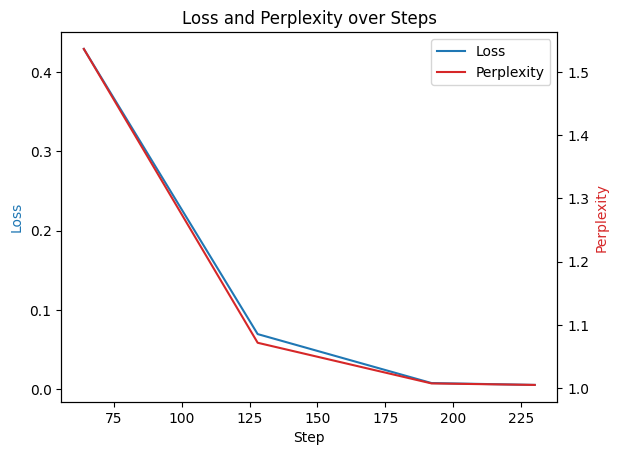

In [6]:
# 图表显示
trainer.show()

从上图来看，发布loss 最低的 step 最为合适

In [7]:
from qianfan.model import Model

m = Model(job_id=trainer_output["job_id"], task_id=trainer_output['task_id'], step=230)
m.publish(name="essay_sft_0513")

[WARNING] [05-13 13:24:09] model.py:94 [t:140413228508992]: model id or version_id should be provided
[INFO] [05-13 13:24:09] model.py:221 [t:140413228508992]: check train job: task-aqzspcqwsk0q/job-6dqr2yv1ti9n status before publishing model
[INFO] [05-13 13:24:09] model.py:234 [t:140413228508992]: model publishing keep polling, current status Done
[INFO] [05-13 13:24:10] model.py:272 [t:140413228508992]: publishing train task: job-6dqr2yv1ti9n/task-aqzspcqwsk0q to model: am-gdwn0zze2dha/amv-jw6bayipu0de
[INFO] [05-13 13:24:41] model.py:297 [t:140413228508992]: model am-gdwn0zze2dha/amv-jw6bayipu0de published successfully
[INFO] [05-13 13:24:41] model.py:277 [t:140413228508992]: publish successfully to model: am-gdwn0zze2dha/amv-jw6bayipu0de


### 2.5.2 微调实验

至此我们完成了一轮针对ERNIE-Speed的训练，并把完成了模型的发布，以进行下一轮的评估操作

我们基于以上的训练过程，我们在ERNIE Speed模型上共计做了5组SFT实验，参数和训练方法配置如下：



| **训练方法**      |  全量更新 |   全量更新 | 全量更新 | LoRA | LoRA |
| ----------------- | --------------- | ---------------- | -------------------- | -------------------- | -------------------- |
| **Epoch**         | 3                    | 10                   | 20 | 3                | 10                |
| **Learning Rate** | 3e-5             | 3e-5             | 3e-5                 | 3e-5                 | 3e-5 |  
| **loss**         | ![all_e3](./img/all_epoch3.png)                    |  ![all_e10](./img/all_epoch10.png)                    |  ![all_e20](./img/all_epoch20.png)  |  ![lora_e3](./img/lora_epoch3.png) | ![lora_e10](./img/lora_epoch10.png)                |

对于实验1和2两个使用LoRA训练方法的训练，Epoch等于3和10都发现Loss曲线收敛不够明显。

对于实验3至5，我们使用全量更新训练方法，该训练方法下Loss曲线有明显收敛，Loss值不断降低。类似该种情况，我们建议增加Epoch数量进行训练，查看Loss指标的变化情况。

但同时，我们可以很好的发现，对于实验5，我们使用全量更新训练方法，Epoch增加至20，我们发现Loss曲线已经接近0，可以判定为*曲线过拟合*。一般出现过拟合，应该在过拟合之前停止实验。

因此，我们尝试将Epoch调整为10，Learning Rate保持在3e-5。发现Loss曲线不断降低，接近于0。初步判断该实验效果会更好。
（当前也可以借由SDK的step发布能力选择在过拟合前的checkpoint进行发布）


## 2.6 模型评估

在训练完成之后，我们还需要对微调后的模型进行效果评估，以确定模型是否已经收敛且能实现我们所期望的效果。

在第一章中我们已经使用过这个评估器了，简单来说我们选择实现一个基于规则的自定义评估器，来评估微调后的模型是否有遵循我们的输出格式，以及各项评估指标，大模型输出和预期输出之间的差距。

In [25]:
from qianfan.evaluation import EvaluationManager
from qianfan.model import Model
from essay_local_eval import EssayEvaluator

# 评估质量得分，按照客观得分模拟计算：
# 作文批改质量分 = 总分分差平均值 / 遵守格式占比
local_evaluator = EssayEvaluator()

# 首先定义EvaluationManager，引入本地评估器
em = EvaluationManager(local_evaluators=[local_evaluator])

In [35]:
# 为了展示，我们直接加载批量评估的结果集合进行评估：
# 实际使用时需要对评估数据集进行批量预测
# eval_infer_result = m.batch_inference(qf_eval_ds)
eval_infer_result = Dataset.load(data_file="./data/eval_data_sample.json")

# 设置用于评估的column：
eval_infer_result.eval_input_column = "input_prompt"
eval_infer_result.eval_llm_output_column = "llm_output"
eval_infer_result.reference_column = "expected_output"
eval_result=em.eval_only(eval_infer_result)

# 展示评估 metrics 信息
import json
print(json.dumps(eval_result.metrics, ensure_ascii=False))

{"遵守格式占比": 1.0, "总分之和计算正确占比": 1.0, "内容评分等级一致占比": 0.8, "内容点评相似度平均值": 0.6609773973783086, "内容评分分差平均值": 1.6, "表达评分等级一致占比": 0.8, "表达点评相似度平均值": 0.7870529810295371, "表达评分分差平均值": 1.6, "发展评分等级一致占比": 0.8, "发展点评相似度平均值": 0.735487299058053, "发展评分分差平均值": 1.4, "扣分解析相似度平均值": 0.7651325031717958, "扣分项扣分分差平均值": 0.0, "总分分差平均值": 4.6, "遵守格式方差": 0.0, "总分之和计算正确方差": 0.0, "内容评分等级一致方差": 0.16, "内容点评相似度方差": 0.006903634592391135, "内容评分分差方差": 5.040000000000001, "表达评分等级一致方差": 0.16, "表达点评相似度方差": 0.0019658604832864875, "表达评分分差方差": 5.040000000000001, "发展评分等级一致方差": 0.16, "发展点评相似度方差": 0.012019283100039324, "发展评分分差方差": 2.2399999999999998, "扣分解析相似度方差": 0.010776959652086162, "扣分项扣分分差方差": 0.0, "总分分差方差": 25.040000000000003, "质量得分（越小越好）": 4.6}


可以看到，评估得到的模型，在回答的稳定性上，较之前的基础模型有所提升，且打分结果更贴近人工打分的结果。

我们还可以将评估的结果数据集保存到本地，方便我们进行进一步的分析

# 3. 大模型服务部署


In [8]:
from qianfan.model import Service, DeployConfig
from qianfan.model.consts import ServiceType
from qianfan.resources.console.consts import DeployPoolType
import logging
from qianfan.utils import enable_log

enable_log(logging.INFO)


sft_svc: Service = m.deploy(DeployConfig(
    name="essay_sft_0513",
    endpoint_prefix="essaysft0513",
    replicas=1,
    pool_type=DeployPoolType.PrivateResource,
    service_type=ServiceType.Chat,
))

[INFO] [05-13 13:24:59] model.py:494 [t:140413228508992]: ready to deploy service with model am-gdwn0zze2dha/amv-jw6bayipu0de
[INFO] [05-13 13:25:03] model.py:529 [t:140413228508992]: please check web console `https://console.bce.baidu.com/qianfan/ais/console/onlineService`,for service  deployment payment.
[INFO] [05-13 13:25:34] model.py:529 [t:140413228508992]: please check web console `https://console.bce.baidu.com/qianfan/ais/console/onlineService`,for service  deployment payment.
[INFO] [05-13 13:26:04] model.py:529 [t:140413228508992]: please check web console `https://console.bce.baidu.com/qianfan/ais/console/onlineService`,for service  deployment payment.
[INFO] [05-13 13:26:34] model.py:529 [t:140413228508992]: please check web console `https://console.bce.baidu.com/qianfan/ais/console/onlineService`,for service  deployment payment.
[INFO] [05-13 13:27:05] model.py:529 [t:140413228508992]: please check web console `https://console.bce.baidu.com/qianfan/ais/console/onlineServic

In [38]:
from qianfan import ChatCompletion
from qianfan.common import Prompt 

with open("prompt/essay_scoring.prompt", mode="r") as f:
    correction_prompt_template = f.read()

#endpoint = sft_svc.endpoint
endpoint = 'xrsleh0v_essaysft0513'
correction_prompt = Prompt(template=correction_prompt_template, identifier="{{}}")
bad_essay = {'title': bad_target['question'], 'essay': bad_target['article']}

chat=ChatCompletion(endpoint=endpoint)
result = chat.do([{"content": correction_prompt.render(**bad_essay)[0], "role": "user"}], stream=True)

for s in result:
    print(s['result'], end='')

{"详细解析": {
    "内容项": {
        "解析": "作文虽然围绕网络的主题，但未能深入探讨题目要求的“人们因技术发展得以更好地掌控时间，但也有人因此成了时间的仆人”这一中心思想。文章仅停留在网络的正反两面，并未结合题目要求展开深入讨论，内容较为单薄，没有体现出对题目深层次的理解和思考。",
        "等级": "三等",
        "得分": "8分"
    },
    "表达项": {
        "解析": "文章结构基本完整，语言基本通顺，但未见特别亮点。整体表达较为平实，缺乏文采和灵动，字迹是否清楚无从得知，但根据文本整齐程度进行评价，可以判为字迹基本清楚。",
        "等级": "三等",
        "得分": "8分"
    },
    "发展等级": {
        "解析": "文章未展现出深刻见解，内容和思想较为肤浅，没有表现出较高的文采和创意。整体留给人的印象平平，没有突出的亮点和创新之处。",
        "等级": "三等",
        "得分": "7分"
    },
    "扣分项和残篇评定": {
        "解析": "文章未见错别字，标点符号使用也未发现明显错误。由于作文字数未给出，无法判断是否存在扣分情况，假设满足字数要求，则不扣分。",
        "扣分": "0分"
    }
},
"缺点和改进意见": {
    "缺点": "文章未紧扣题目要求的中心思想，内容展开不够深入；语言表达较为平实，缺乏文采；创意和构思方面比较普通，未能给人留下深刻印象。",
    "改进意见": "应当结合个人经历或者社会现象，深入展开讨论网络对人们生活方式的影响，提出独到见解。在表达上要注意运用修辞手法和丰富的语言，以增加文章的感染力。同时，在构思上要有一定的创新性，使文章更具吸引力。"
},
"最终得分": "23分"
}

# 4. 总结

针对与作文批改这样特定领域的任务，直接调用高性能大语言模型ERNIE-Speed效果不佳。基于具有通用能力的大语言模型，经过作文批改这样特定领域数据优化和微调，可以在特定领域的效果媲美甚至赶超超大规模参数模型，获得效果好、成本低、速度快的领域大模型。
微调训练中需要关注：
1. 微调数据集的构建，需要满足高质量、真实性、针对性、多样性，数量上最低需要准备100条数据，建议达到5000条的量级为优。
2. 训练的超参数调整，合适的超参数才能获得模型的最佳效果。
3. 模型的效果评估，准确的评估才能更好地指导模型的优化过程。